In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv(r"D:\internship\dataset\data1.csv")

# study of basic info.

In [3]:
data

,Make,Year,Fuel,HP,Cylinders,Transmission Type,Driven_Wheels,Doors,Size,highway MPG,city mpg,Price
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,26,19,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,19,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,20,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...
11910,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,56670
11911,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50620
11912,Acura,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50920
11913,Lincoln,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,26,17,28995


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11915 entries, 0 to 11914
Data columns (total 12 columns):
Make                 11915 non-null object
Year                 11915 non-null int64
Fuel                 11912 non-null object
HP                   11845 non-null float64
Cylinders            11885 non-null float64
Transmission Type    11915 non-null object
Driven_Wheels        11915 non-null object
Doors                11909 non-null float64
Size                 11915 non-null object
highway MPG          11915 non-null int64
city mpg             11915 non-null int64
Price                11915 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.1+ MB


In [5]:
data.describe()

,Year,HP,Cylinders,Doors,highway MPG,city mpg,Price
count,11915.000000,11845.00000,11885.000000,11909.000000,11915.000000,11915.000000,1.191500e+04
mean,2010.385061,249.38607,5.628355,3.436141,26.645992,19.743349,4.059544e+04
std,7.579833,109.19187,1.781233,0.881294,8.911144,9.054705,6.010663e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,4.224000e+04
max,2019.000000,1001.00000,16.000000,4.000000,354.000000,140.000000,2.065902e+06


In [6]:
data.cov()

,Year,HP,Cylinders,Doors,highway MPG,city mpg,Price
Year,57.453864,2.915880e+02,-0.564099,1.762628,17.420194,13.586244,1.036897e+05
HP,291.588019,1.192286e+04,149.338158,-9.892033,-342.948789,-340.853727,4.355284e+06
Cylinders,-0.564099,1.493382e+02,3.172791,-0.219656,-9.564091,-9.141230,5.692387e+04
Doors,1.762628,-9.892033e+00,-0.219656,0.776678,0.916265,0.947925,-6.703168e+03
highway MPG,17.420194,-3.429488e+02,-9.564091,0.916265,79.408494,71.661024,-8.518369e+04
city mpg,13.586244,-3.408537e+02,-9.141230,0.947925,71.661024,81.987675,-8.509218e+04
Price,103689.737520,4.355284e+06,56923.866618,-6703.168489,-85183.685934,-85092.181677,3.612807e+09


In [7]:
data.corr()

,Year,HP,Cylinders,Doors,highway MPG,city mpg,Price
Year,1.000000,0.351794,-0.041762,0.263830,0.257905,0.197955,0.227590
HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.662008
Cylinders,-0.041762,0.779988,1.000000,-0.140198,-0.620857,-0.599250,0.531052
Doors,0.263830,-0.102713,-0.140198,1.000000,0.118522,0.120676,-0.126625
highway MPG,0.257905,-0.406563,-0.620857,0.118522,1.000000,0.888127,-0.159038
city mpg,0.197955,-0.439371,-0.599250,0.120676,0.888127,1.000000,-0.156348
Price,0.227590,0.662008,0.531052,-0.126625,-0.159038,-0.156348,1.000000


HorsePower and Number of cylinders shows positive relation
HorsePower and mileage are inversly proportional to each other
Number of cylinders and mileage are also inversly proportional to each other
Price is directly proportional to HorsePower and Cylinder

In [8]:
data.columns

Index(['Make', 'Year', 'Fuel ', 'HP', 'Cylinders', 'Transmission Type',
       'Driven_Wheels', 'Doors', 'Size', 'highway MPG', 'city mpg', 'Price'],
      dtype='object')

In [9]:
data["Make"].value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              19
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Bugatti   

In [10]:
data['Make'].value_counts().count()

48

In [11]:
data["Year"].value_counts().count()

29

In [12]:
data.rename(columns = {"Fuel ":"Fuel"} , inplace = True)

In [13]:
data["Fuel"].value_counts()

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          67
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Fuel, dtype: int64

In [14]:
data = data[data["Fuel"]!="flex-fuel (unleaded/E85)"]
data = data[data["Fuel"]!="flex-fuel (premium unleaded required/E85)"]
data = data[data["Fuel"]!="flex-fuel (premium unleaded recommended/E85)"]
data = data[data["Fuel"]!="flex-fuel (unleaded/natural gas)"]
data = data[data["Fuel"]!="natural gas"]

In [15]:
data

,Make,Year,Fuel,HP,Cylinders,Transmission Type,Driven_Wheels,Doors,Size,highway MPG,city mpg,Price
0,BMW,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,26,19,46135
1,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,19,40650
2,BMW,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,20,36350
3,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,29450
4,BMW,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...
11910,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,56670
11911,Acura,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50620
11912,Acura,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,23,16,50920
11913,Lincoln,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,26,17,28995


In [16]:
data["Fuel"].replace(["regular unleaded","premium unleaded (required)","premium unleaded (recommended)"],["Petrol","Premium","Premium"],inplace = True)

In [17]:
data["Fuel"].value_counts()

Petrol      7172
Premium     3532
diesel       154
electric      67
Name: Fuel, dtype: int64

removed flex-fuel as they are out of context and alter the data

In [18]:
data["HP"].mean()

244.99650220913108

In [19]:
data["HP"].mode()

0    200.0
dtype: float64

In [20]:
data["Cylinders"].value_counts()

4.0     4628
6.0     4059
8.0     1622
5.0      225
12.0     206
10.0      68
0.0       57
3.0       30
16.0       3
Name: Cylinders, dtype: int64

In [21]:
data["Transmission Type"].value_counts()

AUTOMATIC           7341
MANUAL              2883
AUTOMATED_MANUAL     617
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

In [22]:
data = data[data["Transmission Type"]!="UNKNOWN"]

In [23]:
data["Driven_Wheels"].value_counts()

front wheel drive    4567
rear wheel drive     2972
all wheel drive      2274
four wheel drive     1096
Name: Driven_Wheels, dtype: int64

In [24]:
data["Doors"].value_counts()

4.0    7668
2.0    2969
3.0     266
Name: Doors, dtype: int64

In [25]:
data["Doors"].replace([3],[2],inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
data["Size"].value_counts()

Compact    4645
Midsize    4140
Large      2124
Name: Size, dtype: int64

#Changing Miles per Gallon to Kilometer per litre && price from Dollar to Rupees

In [27]:
data["highway MPG"] = data["highway MPG"].apply(lambda x : x*0.495).round()
data["city mpg"] = data["city mpg"].apply(lambda x : x*0.495).round()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
data

,Make,Year,Fuel,HP,Cylinders,Transmission Type,Driven_Wheels,Doors,Size,highway MPG,city mpg,Price
0,BMW,2011,Premium,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,13.0,9.0,46135
1,BMW,2011,Premium,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,9.0,40650
2,BMW,2011,Premium,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,10.0,36350
3,BMW,2011,Premium,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,9.0,29450
4,BMW,2011,Premium,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,9.0,34500
...,...,...,...,...,...,...,...,...,...,...,...,...
11910,Acura,2012,Premium,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,11.0,8.0,56670
11911,Acura,2012,Premium,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,11.0,8.0,50620
11912,Acura,2013,Premium,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,11.0,8.0,50920
11913,Lincoln,2006,Petrol,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,13.0,8.0,28995


In [29]:
data["Price"] = data["Price"].apply(lambda x : x * 49)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data

,Make,Year,Fuel,HP,Cylinders,Transmission Type,Driven_Wheels,Doors,Size,highway MPG,city mpg,Price
0,BMW,2011,Premium,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,13.0,9.0,2260615
1,BMW,2011,Premium,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,9.0,1991850
2,BMW,2011,Premium,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,10.0,1781150
3,BMW,2011,Premium,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,9.0,1443050
4,BMW,2011,Premium,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,14.0,9.0,1690500
...,...,...,...,...,...,...,...,...,...,...,...,...
11910,Acura,2012,Premium,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,11.0,8.0,2776830
11911,Acura,2012,Premium,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,11.0,8.0,2480380
11912,Acura,2013,Premium,300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,11.0,8.0,2495080
11913,Lincoln,2006,Petrol,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,13.0,8.0,1420755


# Data Visualization

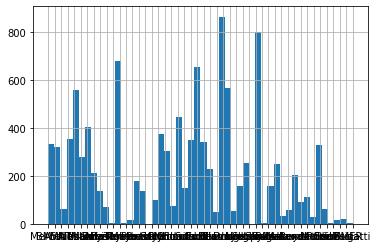

In [31]:
data["Make"].hist(bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000230500E3448>]],
      dtype=object)

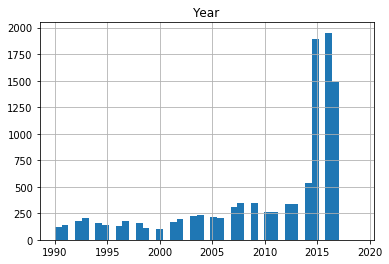

In [32]:
data.hist(column = "Year",bins = 45)

# from this we can say that, more no. of cars are 2014 - 2017 

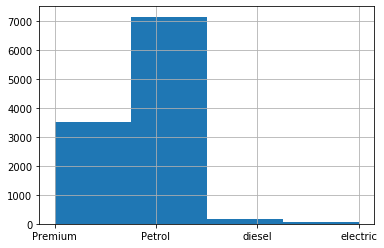

In [33]:
data["Fuel"].hist(bins = 4)

# number of cars ,supporting type of fuel :  Petrol > Premiun > diesel > electric 

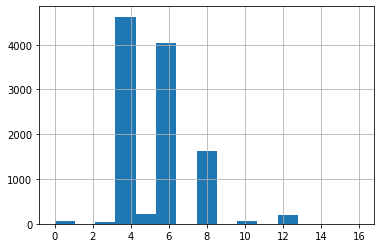

In [34]:
data["Cylinders"].hist(bins = 15)

# most number of cars have 4 , 6 , 8 cylinders engine

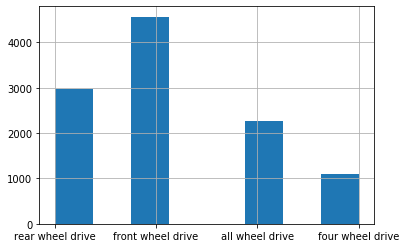

In [35]:
data["Driven_Wheels"].hist(bins =8)

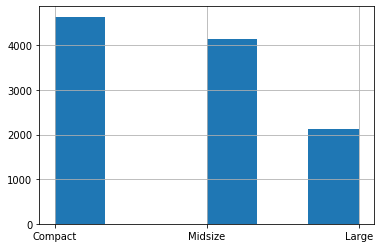

In [36]:
data["Size"].hist(bins = 6)

# number of compact and midsize are almost same

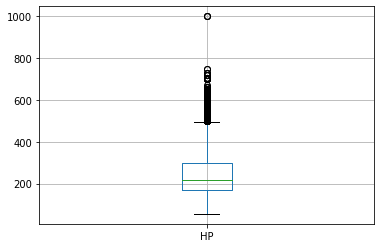

In [37]:
data.boxplot(column ="HP")

horsepower has many number of outliers, will be handled in later part

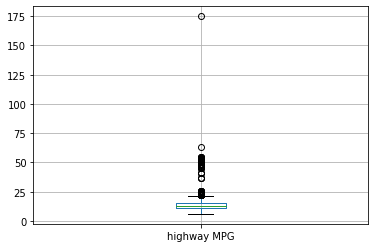

In [38]:
data.boxplot(column ="highway MPG")

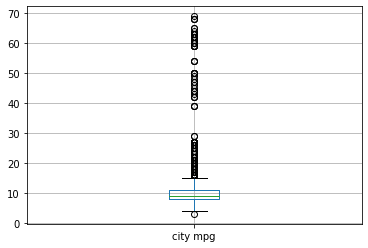

In [39]:
data.boxplot(column = "city mpg")

there are some many outliers because electric cars has high kmple(kilometer per litre equivalent)

# Bivariate Comparison

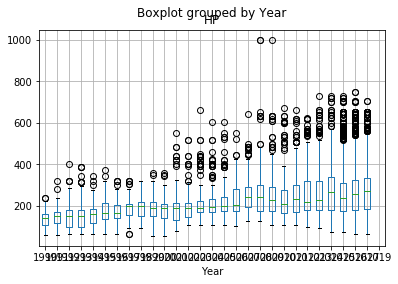

In [40]:
data.boxplot(column ="HP", by ="Year")

# As the year is increasing HorsePower is also increasing, So we can say that by using new technology we are able to harness more horsepower. 

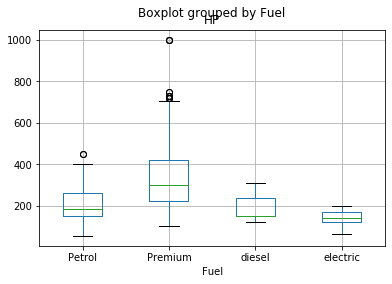

In [41]:
data.boxplot(column = 'HP' ,by = 'Fuel')

# premium fuel gives more horsepower, as they have high octane value and more pure than regular. 

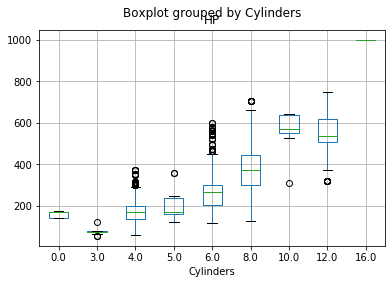

In [42]:
data.boxplot(column = "HP" ,by = "Cylinders")

# increase in cylinder causes increase in Horsepower

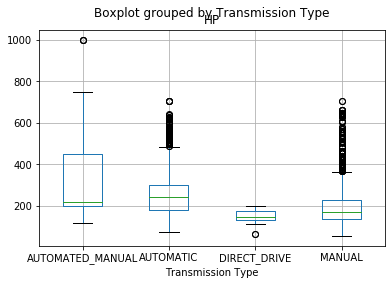

In [43]:
data.boxplot(column = "HP" ,by = "Transmission Type")

# Cars with high horsepower mainly use semi-automatic gear system

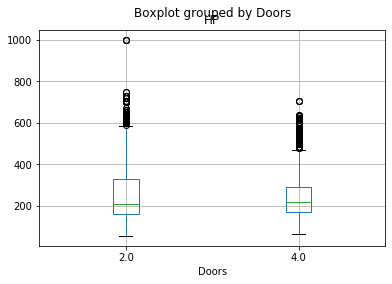

In [44]:
data.boxplot(column = "HP" ,by = "Doors")

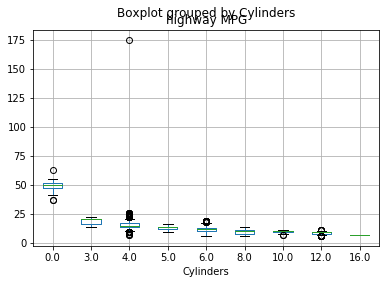

In [45]:
data.boxplot(column = "highway MPG" ,by = "Cylinders")

# 0 cylinders means its electric cars which has high mileage, and as increase in cylinder decreases in mileage

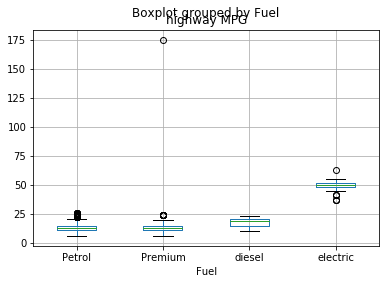

In [46]:
data.boxplot(column = "highway MPG" ,by = "Fuel")

# electric gives high mileage and other give almost same mileage

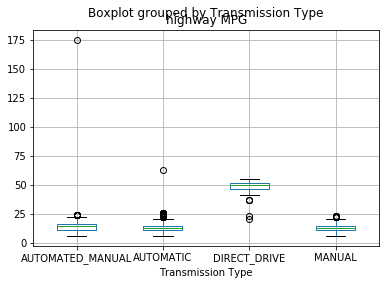

In [47]:
data.boxplot(column = "highway MPG" ,by = "Transmission Type")

In [48]:
pd.crosstab(data["city mpg"],data["Year"],margins = True)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2019,All
city mpg,,,,,,,,,,,,,,,,,,,,,
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4.0,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,0,0,42
5.0,0,20,20,17,7,3,8,3,0,0,...,11,12,14,2,13,13,11,0,0,246
6.0,2,4,12,18,6,10,7,31,44,29,...,10,3,19,20,71,106,80,46,0,739
7.0,45,40,24,28,40,33,23,46,24,18,...,56,23,17,21,48,110,174,169,0,1484
8.0,36,35,32,48,43,53,35,35,48,25,...,60,62,57,39,79,298,247,177,0,2044
9.0,20,24,30,25,26,20,30,37,13,11,...,30,46,63,61,65,271,319,260,0,1633
10.0,14,7,17,16,12,1,11,5,17,6,...,47,60,65,65,47,278,262,247,0,1402
11.0,3,5,21,30,17,5,7,5,5,8,...,20,34,40,44,82,199,249,160,0,1104


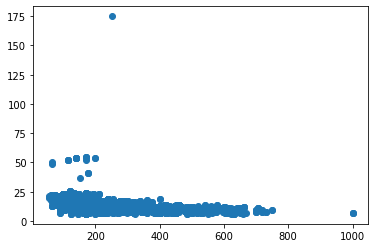

In [49]:
plt.scatter(data["HP"],data["highway MPG"])

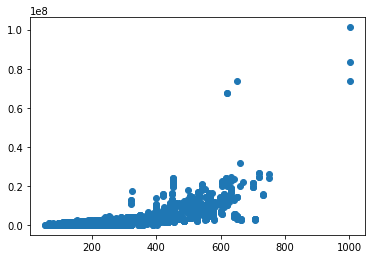

In [50]:
plt.scatter(data["HP"],data["Price"])

In [51]:
import seaborn as sns

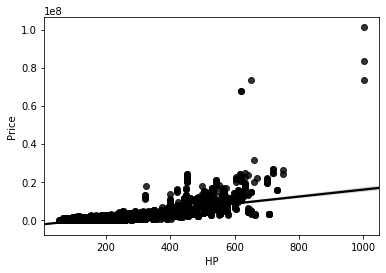

In [52]:
sns.regplot(x = "HP",y = "Price",data = data,color = "black")

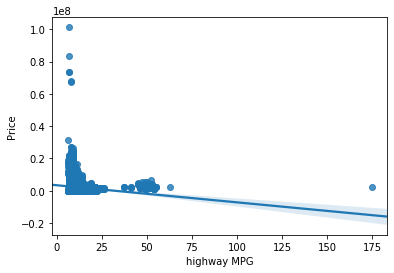

In [53]:
sns.regplot(x = "highway MPG",y="Price",data = data)

# mileage and price are inversely proportional to each other

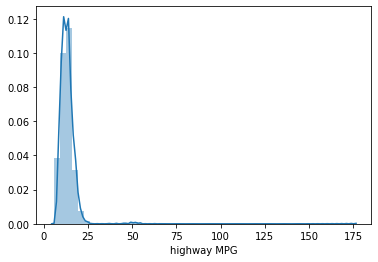

In [54]:
sns.distplot(data["highway MPG"])

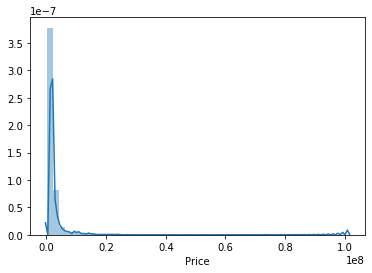

In [55]:
sns.distplot(data["Price"])

In [137]:
from plotly.offline import iplot,init_notebook_mode

In [138]:
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected = True)

In [139]:
data[["Cylinders","highway MPG"]].iplot(kind = "surface",colorscale = "blues")

In [140]:
data[["Cylinders","HP"]].iplot()

In [141]:
data.iplot(kind = "bar" , x= "Fuel",y = "HP" )

In [142]:
corr = data.corr()

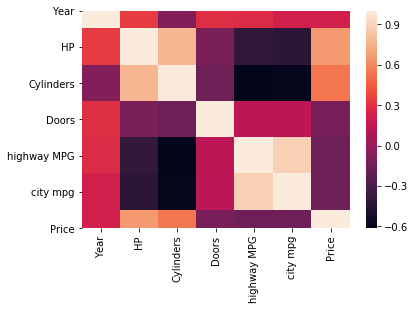

In [143]:
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns)

In [144]:
data["Avg mpl"] = data[["highway MPG","city mpg"]].mean(axis = 1).round()

# Taking care of missing values

    HP and Cylinder of electric vehicles are missing so filling HP of electric by mean of HP of electric and Cylinder by 0

In [145]:
electric = data[data["Fuel"]=="electric"]

In [146]:
electric["HP"].mean()

145.3181818181818

In [147]:
data["HP"].fillna(145.0,inplace = True)
data["Cylinders"].fillna(0,inplace = True)
data["Fuel"].fillna("Petrol",inplace = True)

In [148]:
data.apply(lambda x: sum(x.isnull()),axis = 0)

Make                 0
Year                 0
Fuel                 0
HP                   0
Cylinders            0
Transmission Type    0
Driven_Wheels        0
Doors                6
Size                 0
highway MPG          0
city mpg             0
Price                0
Avg mpl              0
dtype: int64

In [149]:
import statsmodels.api as sm
model = sm.OLS(data["Avg mpl"],data["HP"]).fit()

In [150]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Avg mpl   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                          1.864e+04
Date:                Sat, 30 May 2020   Prob (F-statistic):                        0.00
Time:                        18:29:10   Log-Likelihood:                         -37476.
No. Observations:               10909   AIC:                                  7.495e+04
Df Residuals:                   10908   BIC:                                  7.496e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HP             0.0366      0.000    136.545      0.000       0.036       0.037
==============================================================================
Omnibus:                     4238.079   Durbin-Watson:                   0.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68860.088
Skew:                           1.430   Prob(JB):                         0.00
Kurtosis:                      14.971   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
model = sm.OLS(data["HP"],data["Cylinders"]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     HP   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          1.435e+05
Date:                Sat, 30 May 2020   Prob (F-statistic):                        0.00
Time:                        18:29:10   Log-Likelihood:                         -62016.
No. Observations:               10909   AIC:                                  1.240e+05
Df Residuals:                   10908   BIC:                                  1.240e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cylinders     44.5855      0.118    378.874      0.000      44.355      44.816
==============================================================================
Omnibus:                     1254.018   Durbin-Watson:                   0.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.824
Skew:                           0.737   Prob(JB):                         0.00
Kurtosis:                       4.820   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
model = sm.OLS(data["HP"],data["Avg mpl"]).fit()

In [153]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     HP   R-squared (uncentered):                   0.631
Model:                            OLS   Adj. R-squared (uncentered):              0.631
Method:                 Least Squares   F-statistic:                          1.864e+04
Date:                Sat, 30 May 2020   Prob (F-statistic):                        0.00
Time:                        18:29:11   Log-Likelihood:                         -71036.
No. Observations:               10909   AIC:                                  1.421e+05
Df Residuals:                   10908   BIC:                                  1.421e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Avg mpl       17.2208      0.126    136.545      0.000      16.974      17.468
==============================================================================
Omnibus:                     1444.415   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14064.843
Skew:                          -0.290   Prob(JB):                         0.00
Kurtosis:                       8.532   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:

model = sm.OLS(data["Price"],data[["HP","Cylinders"]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.550
Model:                            OLS   Adj. R-squared (uncentered):              0.550
Method:                 Least Squares   F-statistic:                              6672.
Date:                Sat, 30 May 2020   Prob (F-statistic):                        0.00
Time:                        18:29:11   Log-Likelihood:                     -1.7588e+05
No. Observations:               10909   AIC:                                  3.518e+05
Df Residuals:                   10907   BIC:                                  3.518e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HP           1.75e+04    326.575     53.584      0.000    1.69e+04    1.81e+04
Cylinders  -3.695e+05   1.51e+04    -24.463      0.000   -3.99e+05    -3.4e+05
==============================================================================
Omnibus:                    21650.286   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         84978601.030
Skew:                          15.888   Prob(JB):                         0.00
Kurtosis:                     434.213   Cond. No.                         174.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# MODEL 1

In [155]:
x = data.loc[:,["Fuel","HP","Cylinders"]].values
y = data.loc[:,["Avg mpl"]].values

# performing OneHotEncoding on Fuel column 

In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [157]:
from sklearn.externals import joblib

In [158]:
ct = ColumnTransformer(transformers = [("encoder",OneHotEncoder(),[0])] , remainder = "passthrough")
ct.fit(x)
x = ct.transform(x)

In [159]:
x

array([[0.0, 1.0, 0.0, 0.0, 335.0, 6.0],
       [0.0, 1.0, 0.0, 0.0, 300.0, 6.0],
       [0.0, 1.0, 0.0, 0.0, 300.0, 6.0],
       ...,
       [0.0, 1.0, 0.0, 0.0, 300.0, 6.0],
       [1.0, 0.0, 0.0, 0.0, 221.0, 6.0],
       [0.0, 0.0, 0.0, 1.0, 145.0, 0.0]], dtype=object)

In [160]:
y = y.ravel()

# Splitting in training and testing

In [161]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
model1_forest = RandomForestRegressor(n_estimators=100,random_state = 0)
model1_forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [164]:
model1_forest.predict(x_test)

array([ 8.        ,  7.95738281, 13.01515852, ..., 13.86681138,
       12.58417617, 13.40560324])

In [165]:
model1_forest.score(x_train,y_train)

0.8742467280734784

In [166]:
model1_forest.score(x_test,y_test)

0.9119464917557997

In [169]:
l = np.array([["electric",145.0,0],["Petrol",145,4],["Premium",145,4],["diesel",145,4]])

In [170]:
l = ct.transform(l)

In [171]:
model1_forest.predict(l)

array([51.1098723 , 15.01758329, 14.95815801, 14.10828793])

In [172]:
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error

In [173]:
y_prediction = model1_forest.predict(x_test)

In [174]:
print("Mean Squared Error : ",mean_squared_error(y_test,y_prediction))

Mean Squared Error :  1.8828426463943746


In [175]:
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_prediction)))

Root Mean Squared Error : 1.3721671350073847


In [176]:
print("r2_score :",r2_score(y_test,y_prediction))

r2_score : 0.9119464917557998


In [177]:
print("Root mean squared log error :",np.sqrt(mean_squared_error(y_test,y_prediction)))

Root mean squared log error : 1.3721671350073847


# From the above observation we can say that RandomForestRegressor has performed very well

# for linear regression we gonna perform feature Scaling

In [178]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train[:,4:] = sc.fit_transform(x_train[:,4:])
x_test[:,4:] = sc.transform(x_test[:,4:])

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
model1_linear = LinearRegression()

In [181]:
model1_linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
model1_linear.predict(x_test)

array([ 6.41015625, 10.4921875 , 13.23828125, ..., 12.87890625,
       13.2578125 , 12.83984375])

In [183]:
model1_linear.score(x_test,y_test)

0.7592616842771254

In [184]:
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_log_error
y_prediction = model1_forest.predict(x_test)
print("Mean Squared Error : ",mean_squared_error(y_test,y_prediction))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_prediction)))
print("r2_score :",r2_score(y_test,y_prediction))
print("Root mean squared log error :",np.sqrt(mean_squared_error(y_test,y_prediction)))


Mean Squared Error :  58.95267056563773
Root Mean Squared Error : 7.678064245995714
r2_score : -1.7569959038317369
Root mean squared log error : 7.678064245995714


# from the above observation we will use RandomForestRegressor

# Model2

In [185]:
x2 = data.loc[:,["Fuel","Cylinders","Avg mpl"]].values
y2 = data.loc[:,"HP"].values

In [187]:
x2 = ct.transform(x2)

In [188]:
x2

array([[0.0, 1.0, 0.0, 0.0, 6.0, 11.0],
       [0.0, 1.0, 0.0, 0.0, 6.0, 12.0],
       [0.0, 1.0, 0.0, 0.0, 6.0, 12.0],
       ...,
       [0.0, 1.0, 0.0, 0.0, 6.0, 10.0],
       [1.0, 0.0, 0.0, 0.0, 6.0, 10.0],
       [0.0, 0.0, 0.0, 1.0, 0.0, 66.0]], dtype=object)

In [189]:
y2 = y2.ravel()

In [190]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x2,y2,test_size = 0.2,random_state = 0)

In [191]:
model2 = RandomForestRegressor(n_estimators=100,random_state = 0)
model2.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [192]:
model2.predict(x_test)

array([589.96600328, 220.32688889, 212.45452571, ..., 157.98538774,
       253.78289572, 158.25647433])

In [193]:
model2.score(x_test,y_test)

0.780268020904866

In [194]:
y_pred = model2.predict(x_test)

In [195]:
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score :",r2_score(y_test,y_pred))
print("Root mean squared log error :",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared Error :  2640.4994570209537
Root Mean Squared Error : 51.38579041934602
r2_score : 0.7802680209048661
Root mean squared log error : 51.38579041934602


In [196]:
from sklearn.tree import DecisionTreeRegressor

In [197]:
regressor = DecisionTreeRegressor(random_state = 0,max_depth = 15)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [198]:
regressor.predict(x_test)

array([589.89795918, 220.40336134, 212.50625   , ..., 157.87568556,
       253.66666667, 158.5708502 ])

In [199]:
regressor.score(x_test,y_test)

0.7802892223081859

In [200]:
y_pred = regressor.predict(x_test)

In [201]:
print("Mean Squared Error : ",mean_squared_error(y_test,y_prediction))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_prediction)))
print("r2_score :",r2_score(y_test,y_prediction))
print("Root mean squared log error :",np.sqrt(mean_squared_error(y_test,y_prediction)))

Mean Squared Error :  63205.494358327276
Root Mean Squared Error : 251.40702925401126
r2_score : -4.2597126381197965
Root mean squared log error : 251.40702925401126


# Model 3

In [215]:
x3 = data.loc[:,["Fuel","Cylinders","HP","Transmission Type","Driven_Wheels"]].values
y3 = data.loc[:,["Price"]].values

In [216]:
x3

array([['Premium', 6.0, 335.0, 'MANUAL', 'rear wheel drive'],
       ['Premium', 6.0, 300.0, 'MANUAL', 'rear wheel drive'],
       ['Premium', 6.0, 300.0, 'MANUAL', 'rear wheel drive'],
       ...,
       ['Premium', 6.0, 300.0, 'AUTOMATIC', 'all wheel drive'],
       ['Petrol', 6.0, 221.0, 'AUTOMATIC', 'front wheel drive'],
       ['electric', 0.0, 145.0, 'AUTOMATIC', 'all wheel drive']],
      dtype=object)

In [217]:
y3 = y3.ravel()

In [218]:
ct2 = ColumnTransformer(transformers = [("encoder",OneHotEncoder(),[0,3,4])] , remainder = "passthrough")
ct2.fit(x3)
joblib.dump(ct2 ,"transformer2.pkl")
x3 = ct2.transform(x3)

In [219]:
x3.shape

(10909, 14)

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10909 entries, 0 to 11914
Data columns (total 13 columns):
Make                 10909 non-null object
Year                 10909 non-null int64
Fuel                 10909 non-null object
HP                   10909 non-null float64
Cylinders            10909 non-null float64
Transmission Type    10909 non-null object
Driven_Wheels        10909 non-null object
Doors                10903 non-null float64
Size                 10909 non-null object
highway MPG          10909 non-null float64
city mpg             10909 non-null float64
Price                10909 non-null int64
Avg mpl              10909 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1.2+ MB


In [221]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x3,y3,test_size = 0.2,random_state = 0)

In [222]:
model3 = RandomForestRegressor(n_estimators=100,random_state = 0)
model3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [223]:
model3.score(x_test,y_test)

0.8756989265249289

In [224]:
y_pred = model3.predict(x_test)

In [225]:
print("Mean Squared Error : ",mean_squared_error(y_test,y_prediction))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_prediction)))
print("r2_score :",r2_score(y_test,y_prediction))
print("Root mean squared log error :",np.sqrt(mean_squared_error(y_test,y_prediction)))

Mean Squared Error :  13993034318419.244
Root Mean Squared Error : 3740726.4426070033
r2_score : -0.39229893807013405
Root mean squared log error : 3740726.4426070033


In [226]:
model3.score(x_train,y_train)

0.9396852364937671

In [227]:
model3.predict(x_train)

array([2107080.27332436, 1597533.82366883, 3884188.8826698 , ...,
       1860269.32727028, 2579867.36571766,   98000.        ])